Apuntes del **Curso de Manipulación y Análisis de Datos con Pandas y Python** en Platzi

https://platzi.com/cursos/pandas/

**Repositorio en GitHub**:

https://github.com/OscarABazanez/Manipulacion-y-Analisis-de-Datos-con-Pandas


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame
[4] dataframe.ipynb

## Crear un DataFrame

In [ ]:
dict_data2 = {
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}
df2 = pd.DataFrame(dict_data2,index=['ana','benito','camilo','daniel','erika','fabian','gabriela'])
df2

,edad,cm,pais,genero,Q1,Q2
ana,10,115,co,M,5.0,7.0
benito,9,110,mx,F,10.0,9.0
camilo,13,130,co,F,8.0,9.0
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0
fabian,11,120,ch,M,8.0,8.0
gabriela,12,125,ch,F,3.0,9.0


## Funciones en Pandas

In [ ]:
df2.columns
df2.values
df2.index
#Te mostrara el minimo. maximo, media,std,…etc de las columnas numericas.
df2.describe()

,edad,cm,Q1,Q2
count,7.000000,7.000000,6.000000,7.000000
mean,11.571429,125.714286,6.833333,8.285714
std,1.718249,14.556949,2.483277,0.755929
min,9.000000,110.000000,3.000000,7.000000
25%,10.500000,117.500000,5.500000,8.000000
50%,12.000000,125.000000,7.500000,8.000000
75%,12.500000,127.500000,8.000000,9.000000
max,14.000000,155.000000,10.000000,9.000000


### Valores repetidos y valores unicos

In [ ]:
df2['edad'].value_counts()
df2['edad'].unique()

array([10,  9, 13, 14, 12, 11])

### loc : Localizar registros mediante sus indices y columnas

In [ ]:
df2.loc[['ana','erika'],['edad','cm','Q1']]

,edad,cm,Q1
ana,10,115,5.0
erika,12,125,7.0


### iloc : Obtener un valor usando la posicion del DataFrame

In [ ]:
df2.iloc[[2,3],[1,2,3]]
df2.iloc[:,[1,2,3]]

,cm,pais,genero
ana,115,co,M
benito,110,mx,F
camilo,130,co,F
daniel,155,mx,M
erika,125,mx,M
fabian,120,ch,M
gabriela,125,ch,F


### Query con condiciones

In [ ]:
df2[(df2['edad'] >= 12) & (df2['pais'] == 'mx')]

,edad,cm,pais,genero,Q1,Q2
daniel,14,155,mx,M,NaN,8.0
erika,12,125,mx,M,7.0,8.0


# Manejo de archivos
[5] Indexado y manejo de archivos CSV.ipynb
- sep='-'  Separa mediante el simblo que tu le asigne
- index=False Elimina el indice al exportarlo

## Crear un archivo

In [ ]:
dir_bd = 'db/{}'
df2.to_csv(dir_bd.format('test.csv'))

## Lectura de un archivo

In [ ]:
df_read = pd.read_csv('db/test.csv')
df_read.head(1)

,Unnamed: 0,edad,cm,pais,genero,Q1,Q2
0,ana,10,115,co,M,5.0,7.0


## Formatos de archivos

- **CSV** - Es muy versatil ya que solo tiene comas y saltos de linea
- **JSON** - Tiene un formato muy similar al de un diccionario de Python
- **Excel** - Permite guardar el archivo en formato .xls para trabajar con el en Excel o Spreadsheets
- **Pickle** - Permite comprimir la información, es util cuando se tienen tablas grandes
- **Parquet** - Permite darle un formato que puede usarse en ambientes de Big Data como Hadoop.

Para consultar mas tipos de archivos https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

## Virtudes de los formatos de archivos 
- **CSV y formatos String**: Son simples, requieren alto costo computacional y algo lentos.
- **HDF**: Gran soporte, adecuado para grandes cantidades de datos, rápido a costo de alto costo computacional.
- **Parquet**: Puede igualar a hdf e inclusive trabajar por chunks y en paralelo.
- **Pickle**: Es práctico pero lento con grandes cantidades de datos.

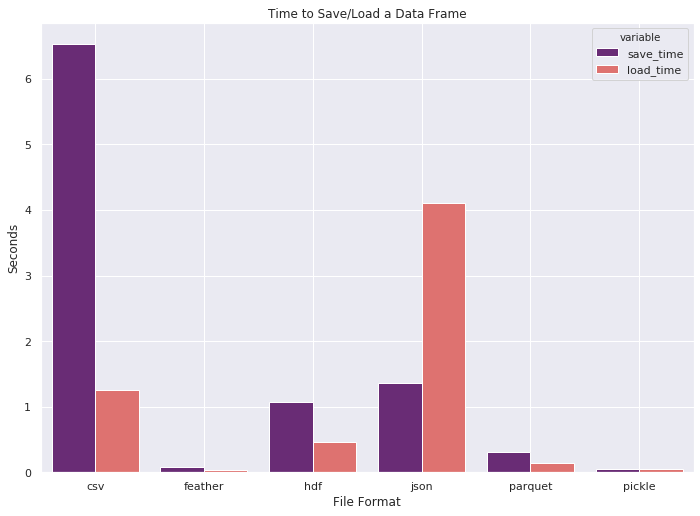
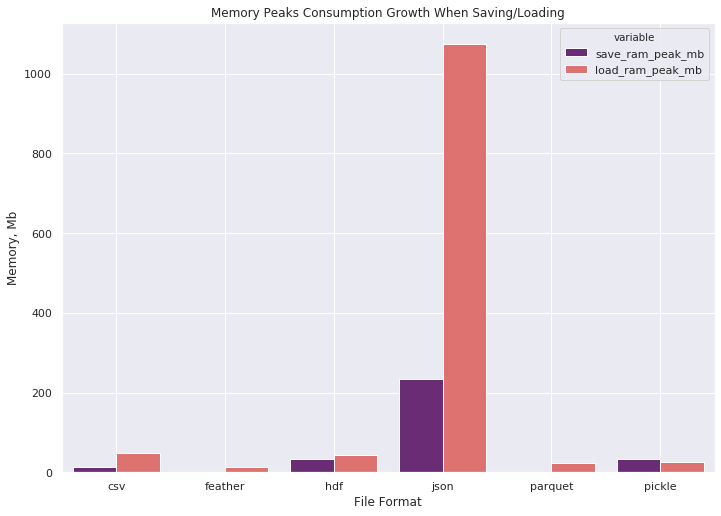
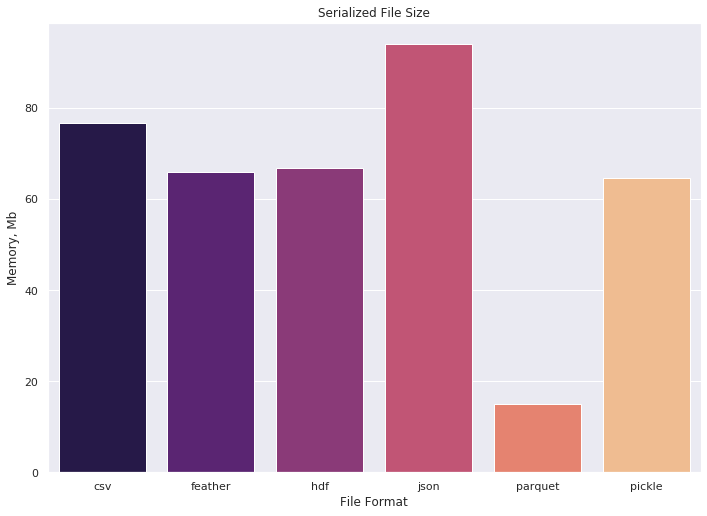
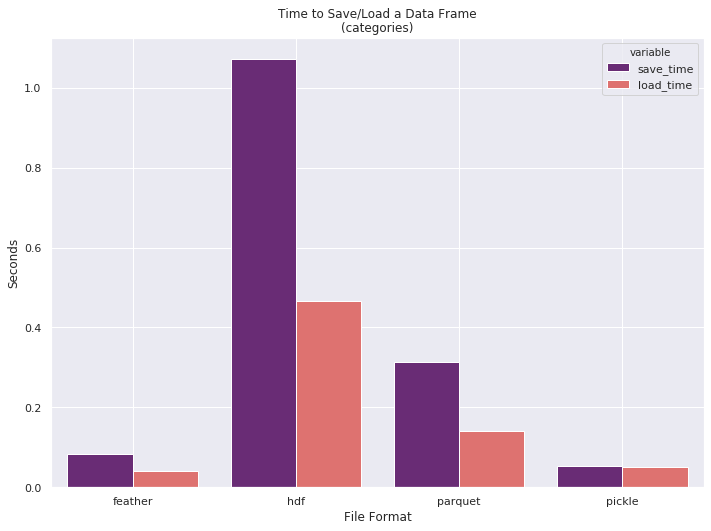
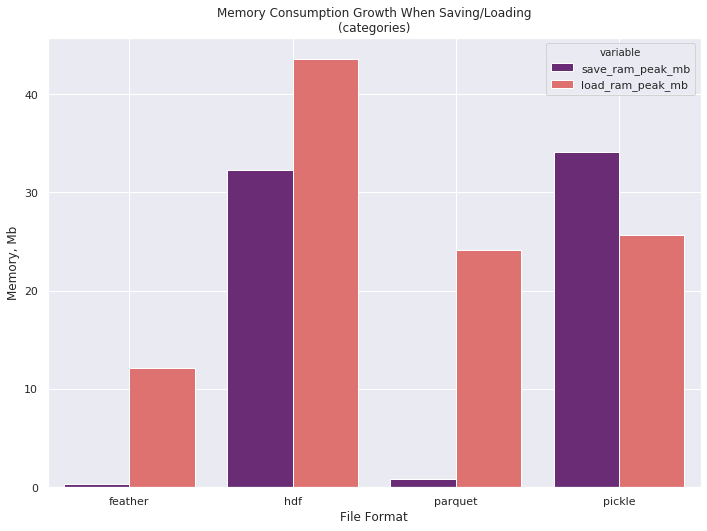
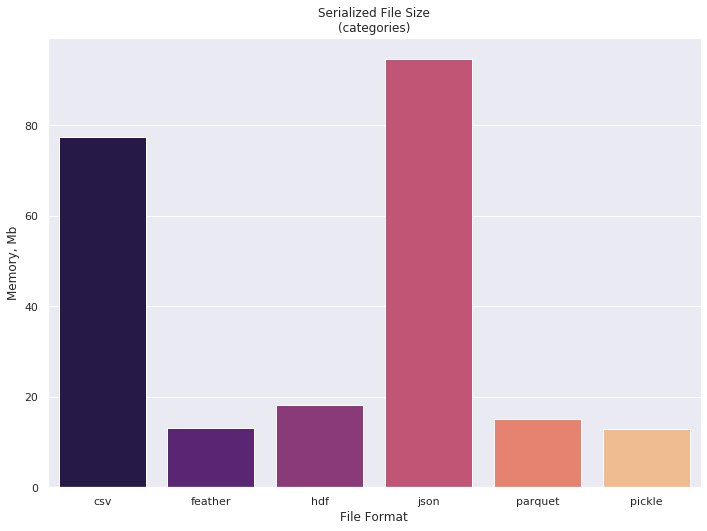

# Conexión a Base de Datos
[6] Conexion con bases de datos tipo SQL.ipynb

## PostgreSQL
Valida que tengas la librería psycopg2 usando el comando import. Si no está instalada en tu ambiente, usa el comando !pip install psycopg2 en la terminal de python para instalarlo.

Comenzamos cargando las librerías:

In [ ]:
import pandas as pd
import psycopg2

Luego creamos el elemento de conexión con el siguieente código:

In [ ]:
conn_sql = psycopg2.connect(user = "user_name",
                            password = "password",
                            host = "xxx.xxx.xxx.xxx",
                            port = "5432",
                            database = "postgres_db_name")

OperationalError: asynchronous connection attempt underway

Seguido simplemente definimos nuestra query en SQL:

In [ ]:
query_sql = '''
select *
from table_name
limit 10
'''

Y creamos nuestro dataframe:

In [ ]:
df = pd.read_sql(query_sql, sql_conn)
df.head(5)

## SQL Server
Valida que tengas la librería pyodbc usando el comando import, si no está instalada en tu ambiente, usa el comando !pip install pyodbc en la terminal python para instalarlo.

Comenzamos cargando las librerías:

In [ ]:
import pandas as pd
import pyodbc

Luego creamos el elemento de conexión con el siguiente código:

In [ ]:
driver = '{SQL Server}'
server_name = 'server_name'
db_name = 'database_name'
user = 'user'
password = 'password'
sql_conn = pyodbc.connect('''
DRIVER={};SERVER={};DATABASE={};UID={};PWD={};
Trusted_Connection=yes
'''.format(driver, server_name, db_name, user, password))

O si tienes el DSN:

In [ ]:
dsn = 'odbc_datasource_name'
sql_conn = pyodbc.connect('''
DSN={};UID={};PWD={};Trusted_Connection=yes;
'''.format(dsn, user, password))
Seguido simplemente definimos nuestra query en SQL:	
query_sql = 'select * from table_name limit 10'

Y creamos nuestro dataframe con:

In [ ]:
df = pd.read_sql(query_sql, sql_conn)
df.head(5)

## MySQL / Oracle / Otras

Valida que tengas la librería sqlalchemy usando el comando import, si no está instalada en tu ambiente, usa el comando !pip install sqlalchemy en la terminal de python para instalarlo.

Comenzamos cargando las librerías:

In [ ]:
import pandas as pd
import sqlalchemy as sql
Escogemos nuestra base de datos, Oracle, MySql o la de tu preferencia:
database_type = 'mysql'
database_type = 'oracle'

Luego creamos el elemento de conexión con el siguiente código:

In [ ]:
user = 'user_name'
password = 'password'
host = 'xxx.xxx.xxx.xxx:port'
database = 'database_name'

conn_string = '{}://{}:{}@{}/{}'.format(
database_type, user, password, host, database)

sql_conn = sql.create_engine(conn_string)

Seguido simplemente definimos nuestra query en SQL:

In [ ]:
query_sql = '''
select *
from table_name
limit 10
'''

Y creamos nuestro dataframe con:

In [ ]:
df = pd.read_sql(query_sql, sql_conn)
df.head(5)

La libreria **sqlalchemy también soporta PostgreSQL y otras fuentes de datos.**

# Tipos de variables
[9]-tipo-de-variables-y-estructura.ipynb

In [ ]:
import pandas as pd
df_meteorites = pd.read_csv('db/Meteorite_Landings.csv')
df_meteorites.tail(1) #Ver los ultimos registros
df_meteorites.sample(1) #Muestra registros aleatorios

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
34498,Queen Alexandra Range 97865,21319,Valid,H6,4.1,Found,01/01/1997 12:00:00 AM,-84.0,168.0,"(-84.0, 168.0)"


## Cantidad de filas y de columans tiene el Data Frame

In [ ]:
df_meteorites.shape

(45716, 10)

## Cantidad de registros que tiene el DataFrame

In [ ]:
df_meteorites.size

457160

## Modifica las decimales que puede tener el DataFrame.

In [ ]:
pd.options.display.float_format='{:,.2f}'.format
df_meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,"45,716.00",45716,45716,"45,585.00",45716,45425,"38,401.00","38,401.00",38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Asuka 881039,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,"26,889.74",NaN,NaN,"13,278.08",NaN,NaN,-39.12,61.07,NaN
std,NaN,"16,860.68",NaN,NaN,"574,988.88",NaN,NaN,46.38,80.65,NaN
min,NaN,1.00,NaN,NaN,0.00,NaN,NaN,-87.37,-165.43,NaN
25%,NaN,"12,688.75",NaN,NaN,7.20,NaN,NaN,-76.71,0.00,NaN
50%,NaN,"24,261.50",NaN,NaN,32.60,NaN,NaN,-71.50,35.67,NaN
75%,NaN,"40,656.75",NaN,NaN,202.60,NaN,NaN,0.00,157.17,NaN


## Informacion sobre las columnas del DataFrame

In [ ]:
df_meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## convert_dtypes : Convierte las columnas en formatos adecuados. 

In [ ]:
df_meteorites.convert_dtypes().dtypes

name            string
id               Int64
nametype        string
recclass        string
mass (g)       Float64
fall            string
year            string
reclat         Float64
reclong        Float64
GeoLocation     string
dtype: object

# Estructura del DataFrame
[9]-tipo-de-variables-y-estructura.ipynb

Convertimos la variable a una ** variable categorica**

Nos ayuda a reducir espacio de uso en los archivos y en la memoria RAM.

In [ ]:
df_meteorites[['fall','nametype']] = df_meteorites[['fall','nametype']].astype('category')
df_meteorites.dtypes

name             object
id                int64
nametype       category
recclass         object
mass (g)        float64
fall           category
year             object
reclat          float64
reclong         float64
GeoLocation      object
dtype: object

## ge_dummies : Convierte las variables categoricas a un indicador dummies

In [ ]:
pd.get_dummies(df_meteorites['fall'])

,Fell,Found
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45711,0,1
45712,0,1
45713,0,1
45714,0,1


## Crear una columna al DataFrame

In [ ]:
df_meteorites[['fell','found']] = pd.get_dummies(df_meteorites['fall'])
df_meteorites.head(2)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,fell,found
0,Aachen,1,Valid,L5,21.00,Fell,01/01/1880 12:00:00 AM,50.77,6.08,"(50.775, 6.08333)",1,0
1,Aarhus,2,Valid,H6,720.00,Fell,01/01/1951 12:00:00 AM,56.18,10.23,"(56.18333, 10.23333)",1,0


## Renombrar columnas
inplace=True  - Nos ayuda aplicar los cambios a nuestro DataFrame

In [ ]:
df_meteorites.rename(columns={'mass (g)':'mass'}, inplace=True)
df_meteorites.dtypes

name             object
id                int64
nametype       category
recclass         object
mass            float64
fall           category
year             object
reclat          float64
reclong         float64
GeoLocation      object
fell              uint8
found             uint8
dtype: object

## Eliminar columnas de un DataFrame

In [ ]:
#df_meteorites.drop(['Nombre_Columna'], axis=1, inplace=True)
df_meteorites.drop(columns = ['id','recclass'],index=[1,2,4,6]).head(1)

,name,nametype,mass,fall,year,reclat,reclong,GeoLocation,fell,found
0,Aachen,Valid,21.00,Fell,01/01/1880 12:00:00 AM,50.77,6.08,"(50.775, 6.08333)",1,0


## Convierte el tiempo a un formato especial

In [ ]:
df_meteorites['year'] = pd.to_datetime(
    df_meteorites['year'],
    errors='coerce',
    format='%m/%d/%Y %H:%M:%S %p'
)
df_meteorites.convert_dtypes().dtypes

name                   string
id                      Int64
nametype             category
recclass               string
mass                  Float64
fall                 category
year           datetime64[ns]
reclat                Float64
reclong               Float64
GeoLocation            string
fell                    UInt8
found                   UInt8
dtype: object

## Copiar un DataFrame

In [ ]:
df = df_meteorites.copy(deep=True)
df.drop(['id'], axis=1, inplace=True)
df.head(1)

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,fell,found
0,Aachen,Valid,L5,21.00,Fell,1880-01-01 12:00:00,50.77,6.08,"(50.775, 6.08333)",1,0


# Funciones especiales y lambda
[10]-funciones-matematicas.ipynb

Funciones matematicas de pandas
```
+    add()
-    sub(), subtract()
*    mul(), multiply()
/    truediv(), div(), divide()
//   floordiv()
%    mod()
**   pow()
```
**apply()** se utiliza para aplicar una función a lo largo de un eje (columna o fila).

**applymap()** se usa para aplicar una función a todos los elementos del DataFrame.

**map()** se usa para sustituir cada valor de una fila por otro valor.

In [ ]:
import pandas as pd
import numpy as np

df_lmerged = pd.read_csv('db/london_merged.csv')
#Convertir el tipo de dato en datetime
df_lmerged['timestamp'] = pd.to_datetime(df_lmerged['timestamp'])
df_lmerged['hour'] = df_lmerged['timestamp'].dt.hour
df_lmerged['hour'] 
df = df_lmerged.iloc[:, 1:]
df['t1'].iloc[::2].sub(df['t2'],fill_value=1000)
df['t1'].add(df['t2'])

0       5.00
1       5.50
2       5.00
3       4.00
4       2.00
        ... 
17409   6.00
17410   6.00
17411   7.00
17412   7.00
17413   6.00
Length: 17414, dtype: float64

## apply() : se utiliza para aplicar una función a lo largo de un eje (columna o fila).

In [ ]:
def fun_1(x, a=4, b=1):
    y = x ** 2 + a*x /b
    return y
df['hour'].apply(fun_1)

0         0.00
1         5.00
2        12.00
3        21.00
4        32.00
         ...  
17409   437.00
17410   480.00
17411   525.00
17412   572.00
17413   621.00
Name: hour, Length: 17414, dtype: float64

In [ ]:
df['hour'].apply(fun_1,a=20,b=-100)

0         0.00
1         0.80
2         3.60
3         8.40
4        15.20
         ...  
17409   357.20
17410   396.00
17411   436.80
17412   479.60
17413   524.40
Name: hour, Length: 17414, dtype: float64

In [ ]:
df['t1'].apply(lambda x: x+273)

0       276.00
1       276.00
2       275.50
3       275.00
4       275.00
         ...  
17409   278.00
17410   278.00
17411   278.50
17412   278.50
17413   278.00
Name: t1, Length: 17414, dtype: float64

## applymap() : se usa para aplicar una función a todos los elementos del DataFrame.

In [ ]:
df.applymap(lambda x: x*510)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour
0,92820,"1,530.00","1,020.00","47,430.00","3,060.00","1,530.00",0.00,510.00,"1,530.00",0
1,70380,"1,530.00","1,275.00","47,430.00","2,550.00",510.00,0.00,510.00,"1,530.00",510
2,68340,"1,275.00","1,275.00","49,215.00",0.00,510.00,0.00,510.00,"1,530.00",1020
3,36720,"1,020.00","1,020.00","51,000.00",0.00,510.00,0.00,510.00,"1,530.00",1530
4,23970,"1,020.00",0.00,"47,430.00","3,315.00",510.00,0.00,510.00,"1,530.00",2040
...,...,...,...,...,...,...,...,...,...,...
17409,531420,"2,550.00",510.00,"41,310.00","9,690.00","1,530.00",0.00,0.00,"1,530.00",9690
17410,275910,"2,550.00",510.00,"41,310.00","10,710.00","2,040.00",0.00,0.00,"1,530.00",10200
17411,171870,"2,805.00",765.00,"40,035.00","12,240.00","2,040.00",0.00,0.00,"1,530.00",10710
17412,114240,"2,805.00",765.00,"38,760.00","11,730.00","2,040.00",0.00,0.00,"1,530.00",11220


# Multiples indices
[11]-multiples-indices.ipynb

In [ ]:
import pandas as pd
import numpy as np

df_prob = pd.read_csv('db/poblacion.csv')
pd.options.display.float_format = '{:,.1f}'.format
df_prob['year'] = pd.Categorical(df_prob['year'].apply(str))
id_filtro = df_prob['Country'].isin(['Aruba','Colombia'])
df_sample = df_prob[id_filtro]

## Crear un indice

In [ ]:
df_sample = df_sample.set_index(['Country','year']).sort_index()
df_sample

pop
Country  year             
Aruba    2015    104,341.0
         2016    104,872.0
         2017    105,366.0
         2018    105,845.0
Colombia 2015 47,520,667.0
         2016 48,171,392.0
         2017 48,901,066.0
         2018 49,648,685.0

## loc : Seleccion de indices en una pequeña muestra

In [ ]:
df_sample.loc['Colombia',:].loc['2016',:]

pop   48,171,392.0
Name: 2016, dtype: float64

## xs : Seleccion de indices en una pequeña muestra

In [ ]:
df_sample.xs(['Aruba','2018'])

pop   105,845.0
Name: (Aruba, 2018), dtype: float64

In [ ]:
df_sample.xs('2018', level='year')

,pop
Country,
Aruba,"105,845.0"
Colombia,"49,648,685.0"


## set_index

In [ ]:
df_countries = df_prob.set_index(['Country','year']).sort_index(ascending=[True,True])
df_countries.head(4)

pop
Country     year             
Afghanistan 2015 34,413,603.0
            2016 35,383,128.0
            2017 36,296,400.0
            2018 37,172,386.0

## Crear un indice con los paises deseados

Por ejemplo: de Aruba a  Austria del año 2015 a 2017

In [ ]:
ids = pd.IndexSlice
df_countries.loc[ids['Aruba':'Austria','2015':'2017'],:].sort_index()

pop
Country   year             
Aruba     2015    104,341.0
          2016    104,872.0
          2017    105,366.0
Australia 2015 23,815,995.0
          2016 24,190,907.0
          2017 24,601,860.0
Austria   2015  8,642,699.0
          2016  8,736,668.0
          2017  8,797,566.0

## Acceder al valor del indice deseado

In [ ]:
df_countries.index.get_level_values(0)

Index(['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania',
       'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria',
       ...
       'Yemen, Rep.', 'Yemen, Rep.', 'Zambia', 'Zambia', 'Zambia', 'Zambia',
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],
      dtype='object', name='Country', length=1040)

## Extraer un dato especifico 
Cuando trabajamos con un DataFrame con multiples indices, podemos extraer un dato en especifico con una cadena de instrucciones.

In [ ]:
df_countries['pop']['Colombia']['2016']

48171392.0

Unas de las **grandes utilidades** es cuando tenemos que aplicar **funciones** matematicas sobre el.
Y nos obtiene la poblacion total en cada año.

In [ ]:
df_countries.sum(level='year')

,pop
year,
2015,"65,679,147,019.0"
2016,"66,487,930,677.0"
2017,"67,294,176,701.0"
2018,"68,087,886,692.0"


## unstack : Nos permite cambia la estructura de nuestro DataFrame.

In [ ]:
df_sample.unstack('year')

pop                                       
year             2015         2016         2017         2018
Country                                                     
Aruba       104,341.0    104,872.0    105,366.0    105,845.0
Colombia 47,520,667.0 48,171,392.0 48,901,066.0 49,648,685.0

# Concat y Append
[13] concat-y-append.ipynb

In [ ]:
np.set_printoptions(precision=2)
x1 = np.random.rand(2,5)*10
x2 = np.random.rand(2,5)*10

s1 = pd.Series(x1[0],index=['a','b','c','d','e'])
s2 = pd.Series(x2[0], index=['c','b','e','f','g'])

df1 = pd.DataFrame(np.random.rand(3,2)*10,columns=['a','b'])
df2 = pd.DataFrame(np.random.rand(3,2)*-1,columns=['a','b'], index=[2,3,4])

## Concatencacion con Numpy

In [ ]:
np.concatenate([x1,x2], axis=1)

array([[8.25, 2.14, 0.42, 9.86, 6.79, 9.37, 5.26, 0.29, 1.99, 4.71],
       [1.51, 4.25, 0.94, 3.87, 1.1 , 8.15, 4.91, 8.01, 1.69, 5.77]])

## Resetear indices

In [ ]:
s1 = s1.reset_index(drop=True)
s2 = s2.reset_index(drop=True)

## Concatenacion con Pandas

In [ ]:
pd.concat([df1,df2], axis=1)

,a,b,a,b
0,7.2,6.7,NaN,NaN
1,1.2,7.0,NaN,NaN
2,4.3,7.8,-0.7,-0.4
3,NaN,NaN,-0.3,-1.0
4,NaN,NaN,-1.0,-0.5


## Guardar solo los indices que comparten los DataFrames

In [ ]:
pd.concat([df1,df2], axis=1, join='inner')

,a,b,a,b
2,4.3,7.8,-0.7,-0.4


## Append : Se puede pegar multiples DataFrames

In [ ]:
df1.append(df2).append(df1)

,a,b
0,7.2,6.7
1,1.2,7.0
2,4.3,7.8
2,-0.7,-0.4
3,-0.3,-1.0
4,-1.0,-0.5
0,7.2,6.7
1,1.2,7.0
2,4.3,7.8


Append a lo largo de los ejes de las **columnas** debemos usar las Traspuesta del DataFrame.

In [ ]:
df1.T.append(df2.T).T

,a,b,a,b
0,7.2,6.7,NaN,NaN
1,1.2,7.0,NaN,NaN
2,4.3,7.8,-0.7,-0.4
3,NaN,NaN,-0.3,-1.0
4,NaN,NaN,-1.0,-0.5


# Merge
[14] merge.ipynb

Funciona exactamente igual como en SQL, pero no tienes que escribir una gran cantidad de codigo y nos permite poder unir diferentes DataFrames seung la relacion que tengan.

In [2]:
df_left = pd.DataFrame(
    {'X':['x0','x1','x2','x3'],
    'W':['w0','w1','w2','w3'],
    'Y':['y0','y1','y2','y3'],
    'Mix':['y2','y3','a2','a3']},
index = [0,1,2,3])
df_right = pd.DataFrame(
    {'Z':['z2','z3','z4','z5'],
     'A':['a2','a3','a4','a5'],
     'Y':['y2','y3','y4','y5']},
index = [2,3,4,5])

In [3]:
pd.merge(df_left,df_right, how='inner', on='Y')

,X,W,Y,Mix,Z,A
0,x2,w2,y2,a2,z2,a2
1,x3,w3,y3,a3,z3,a3


## Unir una columna con otra columna que comparten el mismo nombre.

In [4]:
pd.merge(df_left,df_right, how='inner', left_on='Mix', right_on='Y', suffixes=['_left','_right'])

,X,W,Y_left,Mix,Z,A,Y_right
0,x0,w0,y0,y2,z2,a2,y2
1,x1,w1,y1,y3,z3,a3,y3


In [5]:
pd.merge(df_left,df_right, how='inner', left_on='Mix', right_on='A', suffixes=['_left','_right'])

,X,W,Y_left,Mix,Z,A,Y_right
0,x2,w2,y2,a2,z2,a2,y2
1,x3,w3,y3,a3,z3,a3,y3


## Tipos de Merge

![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

In [6]:
df_left = pd.DataFrame(
    {'X': ['x0', 'x1', 'x2', 'x3'],
    'W': ['w0', 'w1', 'w2', 'w3'], 
    'Y': ['y0', 'y1', 'y2', 'y3'] },
    index=[0,1,2,3])
df_right = pd.DataFrame(
    {'Z': ['z2', 'z3', 'z4', 'z5'],
    'A': ['a2', 'a3', 'a4', 'a5'], 
    'Y': ['y2', 'y3', 'y4', 'y5']},
    index=[2,3,4,5])

### Inner

In [7]:
pd.merge(df_left,df_right, how='inner')

,X,W,Y,Z,A
0,x2,w2,y2,z2,a2
1,x3,w3,y3,z3,a3


### Left

In [8]:
pd.merge(df_left,df_right, how='left', on='Y')

,X,W,Y,Z,A
0,x0,w0,y0,NaN,NaN
1,x1,w1,y1,NaN,NaN
2,x2,w2,y2,z2,a2
3,x3,w3,y3,z3,a3


### Right

In [9]:
pd.merge(df_left,df_right, how='right', on='Y')

,X,W,Y,Z,A
0,x2,w2,y2,z2,a2
1,x3,w3,y3,z3,a3
2,NaN,NaN,y4,z4,a4
3,NaN,NaN,y5,z5,a5


### Outer

In [10]:
pd.merge(df_left,df_right, how='outer', on='Y')

,X,W,Y,Z,A
0,x0,w0,y0,NaN,NaN
1,x1,w1,y1,NaN,NaN
2,x2,w2,y2,z2,a2
3,x3,w3,y3,z3,a3
4,NaN,NaN,y4,z4,a4
5,NaN,NaN,y5,z5,a5


Cuando se comparten mas de un parametro.

In [11]:
df_left2 = pd.DataFrame(
    {'X': ['x0', 'x1', 'x2', 'x3'],
    'W': ['w0', 'w1', 'w2', 'w3'], 
    'Y': ['y0', 'y1', 'y2', 'y3'],
    'A': ['a0', 'a1', 'a2', 'a3'],})
pd.merge(df_left2,df_right,how='outer', on=['Y','A'])

,X,W,Y,A,Z
0,x0,w0,y0,a0,NaN
1,x1,w1,y1,a1,NaN
2,x2,w2,y2,a2,z2
3,x3,w3,y3,a3,z3
4,NaN,NaN,y4,a4,z4
5,NaN,NaN,y5,a5,z5


# Lidiar con datos faltantes
[15] lidiar-con-datos-faltantes-.ipynb

## Objetos nulos
Es muy común que nuestros DataFrames presenten datos faltantes, antes de empezar a procesar nuestros DataFrames veamos un poco en qué consisten los objetos **NaN (Not a Number)**.

Importemos las librerias Pandas y Numpy para esto:

In [ ]:
import numpy as np
import pandas as pd

Un número que no está definido usualmente se representa con el siguiente objeto:
```
np.nan
> nan
```
¡Este objeto tiene propiedades matemáticas! Al sumar un número, obtenemos como
respuesta el mismo **NaN**.
```
np.nan + 0
> nan

np.nan > 0
> False
```
La versión 1.0 de pandas **incluye un nuevo objeto NA**, que es mucho más
general pues, ademas de **interactuar con números, tambien puede hacerlo con
cadenas de texto u otras varaibles como las de tipo booleano**. Si quieres que
esta nueva definición este incluida entre tus cálculos usa:
```
 pd.options.mode.use_inf_as_na = True
```
Al sumar **NA** a una cadena de texto, obtengo el mismo NA:
```
pd.NA +'Hola mundo'
> <NA>

pd.NA | False
> <NA>
```

A continuación, vamos a crear un DataFrame

In [12]:
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


Y vamos a añadir algunas variables no definidas:

In [13]:
df['d'] = np.nan
df['e'] = np.arange(15, 20)
df.loc[5,:] = pd.NA
df.loc[4,'a'] = pd.NA
df.loc[0,'d'] = 1
df.loc[5,'d'] = 10
df

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0
4,<NA>,13.0,14.0,NaN,19.0
5,<NA>,<NA>,<NA>,10,<NA>


### Identifinar un objeto nulo
Para reconocer cuando un objeto es nulo simplmente usamos:

In [14]:
df.isnull()

,a,b,c,d,e
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,True,False,False,True,False
5,True,True,True,False,True


### Sumar objetos nulos.
En dónde todas nuestras variables no definidas fueron marcadas con TRUE,
df.isna() tambien cumple esta función.

Conocer el número de variables nulas por columna puede hacerse juntando el
comando anterior con la funcion de suma:

In [15]:
df.isnull().sum()

a    2
b    1
c    1
d    4
e    1
dtype: int64

### Sumar objetos nulos por filas.
Si lo que nos interesa es conocer el número de filas con elementos nulos, basta
con usar axis=1:

In [16]:
df.notnull().sum(axis=1)

0    5
1    4
2    4
3    4
4    3
5    1
dtype: int64

### Total de objetos nulos
O todos los elementos nulos de nuestro DataFrame:

In [17]:
df.size-df.isnull().sum().sum()

21

### Filtrar por las variables no nulas en la columna ‘a'
Reconocer estos elementos nos puede ayudar a filtrar en nuestro DataFrame, en
este caso, me gustaría filtrar por las variables no nulas de la columna ‘a’:

In [18]:
df[df['a'].notnull()]

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,NaN,16.0
2,6.0,7.0,8.0,NaN,17.0
3,9.0,10.0,11.0,NaN,18.0


### Eliminar filas con registros faltantes
**dropna** es perfecto para elimnar rapidamente las filas con registros faltantes:

In [19]:
df.dropna()

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0


Para eliminar columnas con registros faltantes.

In [20]:
df[['a']].dropna()

,a
0,0.0
1,3.0
2,6.0
3,9.0


### Remplazar un objeto nulo
Ya que hemos visto cómo funcionan las variable nulas, veamos cómo lidiar con
ellas. Usando la función **fillna** podremos reemplazarlas por el valor que
querramos, en este caso 0.

In [21]:
df.fillna(0)

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,0,16.0
2,6.0,7.0,8.0,0,17.0
3,9.0,10.0,11.0,0,18.0
4,0.0,13.0,14.0,0,19.0
5,0.0,0.0,0.0,10,0.0


### Remplazar por el siguiente valor
Si quisieramos remplazar con el valor siguiente usamos
**method="ffill"**:

In [22]:
df.fillna(method="ffill")

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,1,16.0
2,6.0,7.0,8.0,1,17.0
3,9.0,10.0,11.0,1,18.0
4,9.0,13.0,14.0,1,19.0
5,9.0,13.0,14.0,10,19.0


### Remplazar por el valor previo
Si quisieramos remplazar con el valor previo usamos method="bfill":

In [23]:
df.fillna(method="bfill")

,a,b,c,d,e
0,0.0,1.0,2.0,1,15.0
1,3.0,4.0,5.0,10,16.0
2,6.0,7.0,8.0,10,17.0
3,9.0,10.0,11.0,10,18.0
4,<NA>,13.0,14.0,10,19.0
5,<NA>,<NA>,<NA>,10,<NA>


### Remplazar por filas
El mismo ejercicio anterior se puede aplicar con las filas usando axis=1:

In [24]:
df.fillna(method="bfill",axis=1)

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,16.0,16.0
2,6.0,7.0,8.0,17.0,17.0
3,9.0,10.0,11.0,18.0,18.0
4,13.0,13.0,14.0,19.0,19.0
5,10.0,10.0,10.0,10.0,<NA>


Podemos usar también una serie para reemplazar los valores de una columna en especifico, es importante que haya emparejamiento entre los índices:

In [25]:
fill = pd.Series([100, 101, 102])
fill

0    100
1    101
2    102
dtype: int64

In [26]:
df['d'] = df['d'].fillna(fill)
df['d']

0      1.0
1    101.0
2    102.0
3      NaN
4      NaN
5     10.0
Name: d, dtype: float64

## Formas de remplazar mas usadas

### Por promedio o mediana de las columnas.
Una de las formas **más usadas para reemplazar datos es usar el promedio de las columnas**, esto se hace con la función mean. O si se quiere un mejor estimador, usamos median.

In [27]:
df.fillna(df.median())

,a,b,c,d,e
0,0.0,1.0,2.0,1.0,15.0
1,3.0,4.0,5.0,101.0,16.0
2,6.0,7.0,8.0,102.0,17.0
3,9.0,10.0,11.0,55.5,18.0
4,4.5,13.0,14.0,55.5,19.0
5,4.5,7.0,8.0,10.0,17.0


### Por valor que puede haber existido en el medio.
Por último, Pandas también puede interporlar los valores faltanes calculando el **valor que puede haber existido** en el medio.

In [28]:
df_d = pd.concat([df[['d']], df[['d']].interpolate()],axis=1)
df_d.columns = ['d_antes','d_interpolado']
df_d

,d_antes,d_interpolado
0,1.0,1.000000
1,101.0,101.000000
2,102.0,102.000000
3,NaN,71.333333
4,NaN,40.666667
5,10.0,10.000000


# Group by
[16] group-by.ipynb
Se pueden aplicar funciones cada vez que agrupemos los datos

In [32]:
pd.options.display.float_format = '{:,.3f}'.format
df = sns.load_dataset('diamonds')
df.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.703,61.709,55.952,"3,457.542",5.507,5.520,3.401
Premium,0.892,61.265,58.746,"4,584.258",5.974,5.945,3.647
Very Good,0.806,61.818,57.956,"3,981.760",5.741,5.770,3.560
Good,0.849,62.366,58.695,"3,928.864",5.839,5.851,3.640
Fair,1.046,64.042,59.054,"4,358.758",6.247,6.183,3.983


## Recorrer una agrupacion

In [33]:
for key_group, group in df.groupby('cut'):
    grouped_price = group['price'].mean()
    print('Cut: {}, Price: {}, \n'.format(key_group,grouped_price))

Cut: Ideal, Price: 3457.541970210199, 

Cut: Premium, Price: 4584.2577042999055, 

Cut: Very Good, Price: 3981.7598907465654, 

Cut: Good, Price: 3928.864451691806, 

Cut: Fair, Price: 4358.757763975155, 



## Agrupar por multiples paramentros

In [34]:
df.groupby(['cut','color'])['price'].mean().to_frame()

price
cut       color          
Ideal     D     2,629.095
          E     2,597.550
          F     3,374.939
          G     3,720.706
          H     3,889.335
          I     4,451.970
          J     4,918.186
Premium   D     3,631.293
          E     3,538.914
          F     4,324.890
          G     4,500.742
          H     5,216.707
          I     5,946.181
          J     6,294.592
Very Good D     3,470.467
          E     3,214.652
          F     3,778.820
          G     3,872.754
          H     4,535.390
          I     5,255.880
          J     5,103.513
Good      D     3,405.382
          E     3,423.644
          F     3,495.750
          G     4,123.482
          H     4,276.255
          I     5,078.533
          J     4,574.173
Fair      D     4,291.061
          E     3,682.312
          F     3,827.003
          G     4,239.255
          H     5,135.683
          I     4,685.446
          J     4,975.655

## Ejecutar multiples funciones al agrupar

In [35]:
def mean_kilo(x):
    return np.mean(x)
df.groupby(['cut','color'])['price'].aggregate(['min',np.mean,max,mean_kilo]).head(10)

min      mean    max  mean_kilo
cut     color                                 
Ideal   D      367 2,629.095  18693  2,629.095
        E      326 2,597.550  18729  2,597.550
        F      408 3,374.939  18780  3,374.939
        G      361 3,720.706  18806  3,720.706
        H      357 3,889.335  18760  3,889.335
        I      348 4,451.970  18779  4,451.970
        J      340 4,918.186  18508  4,918.186
Premium D      367 3,631.293  18575  3,631.293
        E      326 3,538.914  18477  3,538.914
        F      342 4,324.890  18791  4,324.890

## Crear un diccionario de funciones a ejecutar

In [36]:
dict_agg = {'carat' : [min,max], 'price' : [np.mean,mean_kilo]}

df.groupby(['cut','color']).aggregate(dict_agg)

carat           price          
                  min   max      mean mean_kilo
cut       color                                
Ideal     D     0.200 2.750 2,629.095 2,629.095
          E     0.200 2.280 2,597.550 2,597.550
          F     0.230 2.450 3,374.939 3,374.939
          G     0.230 2.540 3,720.706 3,720.706
          H     0.230 3.500 3,889.335 3,889.335
          I     0.230 3.220 4,451.970 4,451.970
          J     0.230 3.010 4,918.186 4,918.186
Premium   D     0.200 2.570 3,631.293 3,631.293
          E     0.200 3.050 3,538.914 3,538.914
          F     0.200 3.010 4,324.890 4,324.890
          G     0.230 3.010 4,500.742 4,500.742
          H     0.230 3.240 5,216.707 5,216.707
          I     0.230 4.010 5,946.181 5,946.181
          J     0.300 4.010 6,294.592 6,294.592
Very Good D     0.230 2.580 3,470.467 3,470.467
          E     0.200 2.510 3,214.652 3,214.652
          F     0.230 2.480 3,778.820 3,778.820
          G     0.230 2.520 3,872.754 3,872.754
          H     0.230 3.000 4,535.390 4,535.390
          I     0.240 4.000 5,255.880 5,255.880
          J     0.240 2.740 5,103.513 5,103.513
Good      D     0.230 2.040 3,405.382 3,405.382
          E     0.230 3.000 3,423.644 3,423.644
          F     0.230 2.670 3,495.750 3,495.750
          G     0.230 2.800 4,123.482 4,123.482
          H     0.250 3.010 4,276.255 4,276.255
          I     0.300 3.010 5,078.533 5,078.533
          J     0.280 3.000 4,574.173 4,574.173
Fair      D     0.250 3.400 4,291.061 4,291.061
          E     0.220 2.040 3,682.312 3,682.312
          F     0.250 2.580 3,827.003 3,827.003
          G     0.230 2.600 4,239.255 4,239.255
          H     0.330 4.130 5,135.683 5,135.683
          I     0.410 3.020 4,685.446 4,685.446
          J     0.300 5.010 4,975.655 4,975.655

## Funciones de filtros

In [37]:
def f_filter(x):
    return mean_kilo(x['price']) > 4

df.groupby(['cut']).filter(f_filter)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.230,Ideal,E,SI2,61.500,55.000,326,3.950,3.980,2.430
1,0.210,Premium,E,SI1,59.800,61.000,326,3.890,3.840,2.310
2,0.230,Good,E,VS1,56.900,65.000,327,4.050,4.070,2.310
3,0.290,Premium,I,VS2,62.400,58.000,334,4.200,4.230,2.630
4,0.310,Good,J,SI2,63.300,58.000,335,4.340,4.350,2.750
...,...,...,...,...,...,...,...,...,...,...
53935,0.720,Ideal,D,SI1,60.800,57.000,2757,5.750,5.760,3.500
53936,0.720,Good,D,SI1,63.100,55.000,2757,5.690,5.750,3.610
53937,0.700,Very Good,D,SI1,62.800,60.000,2757,5.660,5.680,3.560
53938,0.860,Premium,H,SI2,61.000,58.000,2757,6.150,6.120,3.740


In [38]:
df.groupby(['cut']).filter(f_filter)['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

## Aplicar Aggregation y groupby

In [39]:
df = sns.load_dataset('tips')

Nos muestra el procentaje que tienen nuestros datos correspondiendo a cada dia que se trabaja.

In [40]:
df['day'].value_counts() / df['day'].value_counts().sum()*100

Sat    35.656
Sun    31.148
Thur   25.410
Fri     7.787
Name: day, dtype: float64

Las gastos totales que hacen cada genero.

In [41]:
df.groupby('sex').median()

,total_bill,tip,size
sex,,,
Male,18.350,3.000,2
Female,16.400,2.750,2


Creamos una columna con el porcentaje de propina que se geneta por el total de una cuenta.

In [42]:
df['prct_tip'] = df['tip']/df['total_bill']
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161


### Funciones en agrupaciones 

In [43]:
df.groupby('sex')[['prct_tip']].describe()

prct_tip                                          
          count  mean   std   min   25%   50%   75%   max
sex                                                      
Male    157.000 0.158 0.065 0.036 0.121 0.153 0.186 0.710
Female   87.000 0.166 0.054 0.056 0.140 0.156 0.194 0.417

### Funciones a multiples grupos

In [44]:
df.groupby('sex')[['prct_tip','total_bill']].describe()

prct_tip                                           total_bill         \
          count  mean   std   min   25%   50%   75%   max      count   mean   
sex                                                                           
Male    157.000 0.158 0.065 0.036 0.121 0.153 0.186 0.710    157.000 20.744   
Female   87.000 0.166 0.054 0.056 0.140 0.156 0.194 0.417     87.000 18.057   

                                                
         std   min    25%    50%    75%    max  
sex                                             
Male   9.246 7.250 14.000 18.350 24.710 50.810  
Female 8.009 3.070 12.750 16.400 21.520 44.300

### Funciones personalizadas

In [45]:
def mean_eur_to_usd(x):
    return np.mean(x)*1.12

df.groupby(['sex','time'])[['prct_tip','total_bill']].apply(mean_eur_to_usd)

prct_tip  total_bill
sex    time                        
Male   Lunch      0.186      20.214
       Dinner     0.174      24.037
Female Lunch      0.182      18.300
       Dinner     0.190      21.519

### Multiples funciones
Obtenemos el valor promedio y maximo de las facturas y las propinas

In [46]:
df.groupby(['sex','time'])[['total_bill','prct_tip']].agg([np.mean,np.max])

total_bill        prct_tip      
                    mean   amax     mean  amax
sex    time                                   
Male   Lunch      18.048 41.190    0.166 0.266
       Dinner     21.461 50.810    0.155 0.710
Female Lunch      16.339 43.110    0.162 0.259
       Dinner     19.213 44.300    0.169 0.417

In [47]:
dict_agg = {'tip':[min, max],'total_bill':[np.mean, mean_eur_to_usd]}
df.groupby(['sex','time'])[['total_bill','tip']].agg(dict_agg)

tip        total_bill                
                min    max       mean mean_eur_to_usd
sex    time                                          
Male   Lunch  1.440  6.700     18.048          20.214
       Dinner 1.000 10.000     21.461          24.037
Female Lunch  1.250  5.170     16.339          18.300
       Dinner 1.000  6.500     19.213          21.519

### Filtrar elementos con filtros personalizados

In [50]:
def filter_bill(x):
    return mean_eur_to_usd(x['total_bill'].mean()) > 20
df_filtered = df.groupby(['sex','time']).filter(filter_bill)
df_filtered.head(3)

,total_bill,tip,sex,smoker,day,time,size,prct_tip
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161
2,21.010,3.500,Male,No,Sun,Dinner,3,0.167


In [51]:
df_filtered.groupby(['sex','time']).count()

total_bill  tip  smoker  day  size  prct_tip
sex    time                                                
Male   Lunch           33   33      33   33    33        33
       Dinner         124  124     124  124   124       124
Female Lunch            0    0       0    0     0         0
       Dinner          52   52      52   52    52        52

## Group By: extraer valor con variables categóricas
Podemos extraer variables categoricas usando un **pequeño truco** el cual consite en agregar una columna con numeros unos.

In [54]:
df['ones'] = 1

Obtenemos los valores y el procentaje de las personas que son fumantes

In [55]:
df_g = df.groupby(['sex','smoker'])[['ones']].sum()
df_g

ones
sex    smoker      
Male   Yes       60
       No        97
Female Yes       33
       No        54

In [56]:
df_g.groupby(level=0).apply(
    lambda x:
    x / x.sum() * 100
)

ones
sex    smoker       
Male   Yes    38.217
       No     61.783
Female Yes    37.931
       No     62.069

### Transformar nuestras variables numericas en una categorica.
Con **bins** podemos definir el ancho que queremos tener en nuestras categorias.

Por ejemplo podemos tener una categoria de 3.

In [57]:
pd.cut(df['total_bill'], bins = 3).value_counts()

(3.022, 18.983]     140
(18.983, 34.897]     88
(34.897, 50.81]      16
Name: total_bill, dtype: int64

Otro seria una categoria que va de los 3 a 18 dolares y de los 18 a los 35 dolares.

In [58]:
pd.cut(df['total_bill'], bins=[3,18,35,70]).value_counts()

(3, 18]     127
(18, 35]    101
(35, 70]     16
Name: total_bill, dtype: int64

Podremos observar que cada factura sera asignara una categoria segun el total de su factura.

In [59]:
df['bin_total'] = pd.cut(df['total_bill'], bins=[3,18,35,70])
df

,total_bill,tip,sex,smoker,day,time,size,prct_tip,ones,bin_total
0,16.990,1.010,Female,No,Sun,Dinner,2,0.059,1,"(3, 18]"
1,10.340,1.660,Male,No,Sun,Dinner,3,0.161,1,"(3, 18]"
2,21.010,3.500,Male,No,Sun,Dinner,3,0.167,1,"(18, 35]"
3,23.680,3.310,Male,No,Sun,Dinner,2,0.140,1,"(18, 35]"
4,24.590,3.610,Female,No,Sun,Dinner,4,0.147,1,"(18, 35]"
...,...,...,...,...,...,...,...,...,...,...
239,29.030,5.920,Male,No,Sat,Dinner,3,0.204,1,"(18, 35]"
240,27.180,2.000,Female,Yes,Sat,Dinner,2,0.074,1,"(18, 35]"
241,22.670,2.000,Male,Yes,Sat,Dinner,2,0.088,1,"(18, 35]"
242,17.820,1.750,Male,No,Sat,Dinner,2,0.098,1,"(3, 18]"


Vamos a poder observar el procentaje total de las facturas que se generan segun su categoria.

In [60]:
df.groupby(['time','bin_total'])[['ones']].count().groupby(level=0).apply(lambda x: x/x.sum()*100)

ones
time   bin_total       
Lunch  (3, 18]   66.176
       (18, 35]  30.882
       (35, 70]   2.941
Dinner (3, 18]   46.591
       (18, 35]  45.455
       (35, 70]   7.955

# Lidiar con datos duplicados
[17] lidiar-datos-duplicados.ipynb

In [71]:
df = pd.DataFrame({'a': ['w'] * 4 + ['x'] * 3 + ['y'] * 2 + ['z']+['v'], 
    'b': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4,5]})

## Encontrar duplicados
Para encontrar los registros duplicados usamos **duplicated** , que marca con **True** aquellos casos de filas duplicadas:

In [72]:
df.duplicated() # Ver duplicados

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

Podemos usar **keep='first'** para marcar solo la primera ocurrencia o **keep='last'** para marcar la última:

In [73]:
#keep='last' o 'first, marca la primer/ultima ocurrencia
df.duplicated(keep='first')

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9     False
10    False
dtype: bool

In [74]:
df.duplicated(keep='last')

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

## Mostrar los registros no duplicados
Identificados los casos duplicados, podemos usar este resultado para filtrar y seleccionar aquellos que no tienen un registro duplicado:

In [75]:
#Filtra casos que no estan duplicados, ~ = negacion
df[~ df.duplicated()]

,a,b
0,w,1
4,x,2
7,y,3
9,z,4
10,v,5


Si quisieras dejar el **primer registro** de los duplicados o **el último**, recuerda usar** keep='first'** o **keep='last'**. Remarco el hecho de **que usé negación '~' para ver los registros no duplicados**.

Y si me interesara **ver** cuáles son los registros **duplicados**, podemos usar **keep=False**:

In [76]:
# Marca todos los registros duplicados
df.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
dtype: bool

In [77]:
df[df.duplicated(keep=False)]

,a,b
0,w,1
1,w,1
2,w,1
3,w,1
4,x,2
5,x,2
6,x,2
7,y,3
8,y,3


## Eliminar registros duplicados de una columna
Por último, puedes usar el comando 'drop_duplicates' para eliminar los duplicados. Por defecto, la función guarda el primer resultado keep='first':

In [78]:
# descarta los registros duplicados, tiene por defecto el keep = first
df.drop_duplicates(['a'],keep='last')

,a,b
3,w,1
6,x,2
8,y,3
9,z,4
10,v,5


# Tabla dinamica con Pivot

In [79]:
pd.options.display.float_format = '{:,.3f}'.format
df = sns.load_dataset('tips')
df_gp = df.groupby(['sex','time'])[['total_bill']].mean().reset_index()
df_gp

,sex,time,total_bill
0,Male,Lunch,18.048
1,Male,Dinner,21.461
2,Female,Lunch,16.339
3,Female,Dinner,19.213


# Creando Pivot Table
Pivot nos ayuda crear tablas con **indices categoricos**
Pivot nos permite poder crear una tabla apartir de una agrupacion o crearla apartir del DataFrame original.
<img src='https://pandas-docs.github.io/pandas-docs-travis/_images/reshaping_pivot.png'>

In [ ]:
df_gp.pivot_table(values='total_bill', index='sex', columns='time')

## Multiples funciones

In [80]:
df_pivot = df.pivot_table(values='total_bill', index='sex', columns='time', aggfunc=[np.median,np.std])
df_pivot

median          std       
time    Lunch Dinner Lunch Dinner
sex                              
Male   16.580 19.630 7.953  9.461
Female 13.420 17.190 7.501  8.202

**Unstack**: Nos deshace las categorias.

**reset_index**: Si lo queremos volver hacer un DataFrames.

In [81]:
df_pivot.unstack().reset_index()

,level_0,time,sex,0
0,median,Lunch,Male,16.580
1,median,Lunch,Female,13.420
2,median,Dinner,Male,19.630
3,median,Dinner,Female,17.190
4,std,Lunch,Male,7.953
5,std,Lunch,Female,7.501
6,std,Dinner,Male,9.461
7,std,Dinner,Female,8.202


Se muestra la media de los fumadores que gastan mas en sus facturas y propinas

In [82]:
df.pivot_table(values=['total_bill','tip'], index='smoker', columns='time', aggfunc=[np.median,np.std])

median                            std                         
          tip        total_bill          tip        total_bill       
time    Lunch Dinner      Lunch Dinner Lunch Dinner      Lunch Dinner
smoker                                                               
Yes     2.500  3.000     16.000 20.695 1.056  1.500      7.871 10.205
No      2.180  3.000     15.950 18.265 1.283  1.399      7.719  8.343

# Series de tiempo

In [94]:
df = pd.read_csv('db/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df_time = df.groupby('ObservationDate').sum()
df_diff = df_time.diff()

## Suma acumulativa(cumsum)

In [95]:
df_diff.cumsum().head(4)

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,NaN,NaN,NaN,NaN
2020-01-23,"2,088.000",98.000,1.000,2.000
2020-01-24,"3,564.000",386.000,9.000,8.000
2020-01-25,"5,749.000",883.000,25.000,11.000


## Resamople : Nos ayuda a manejar las series de tiempo.
Podemos obtener valores de una seriede tiempo especifico y aplicar funciones.

| Alias      | Description           |
| ---------- |:---------------------:|
| B          | Business day          |
| D          | Calendar day          |
| W          | Weekly                |
| M          | Month end             |
| Q          | Quarter end           |
| A          | Year end              |
| BA         | Business year end     |
| AS         | Year start            |
| H          | Hourly frequency      |
| T, min     | Minutely frequency    |
| S          | Secondly frequency    |
| L, ms      | Millisecond frequency |
| U, us      | Microsecond frequency |
| N, ns      | Nanosecond frequency  |


In [96]:
df_diff.resample('W-sun').sum()

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-26,"8,330.000","1,563.000",39.000,24.000
2020-02-02,"30,727.000","14,669.000",306.000,420.000
2020-02-09,"38,502.000","23,364.000",544.000,"2,772.000"
2020-02-16,"41,925.000","31,075.000",864.000,"7,621.000"
2020-02-23,"62,780.000","7,759.000",699.000,"12,529.000"
2020-03-01,"177,120.000","9,386.000",527.000,"19,322.000"
2020-03-08,"170,355.000","6,753.000",258.000,"8,455.000"


## Variable nulas en series de tiempo

In [97]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22 00:00:00,741.000,555.000,17.000,28.000
2020-01-22 12:00:00,NaN,NaN,NaN,NaN
2020-01-23 00:00:00,"2,829.000",653.000,18.000,30.000
2020-01-23 12:00:00,NaN,NaN,NaN,NaN
2020-01-24 00:00:00,"4,305.000",941.000,26.000,36.000
...,...,...,...,...
2020-03-02 00:00:00,"424,974.000","90,309.000","3,085.000","45,602.000"
2020-03-02 12:00:00,NaN,NaN,NaN,NaN
2020-03-03 00:00:00,"477,160.000","92,844.000","3,160.000","48,229.000"


### Completar los valores nulos
**Bfill** : copia el valor siguiente donde habia un valor nulo.

**ffill** : copia el valor previo donde habia un valor nulo.

**fillna(A-remplazar)** : Remplazamos por el valor que deseamos.

**interpolate()** : Nos ayuda a crear valores medion entre los espacios de valores nulos de acuerdo la valor previo y siguiente.

In [98]:
df_cum.bfill()
df_cum.ffill()
df_cum = df_cum.interpolate()
df_cum.head(3)

,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22 00:00:00,741.000,555.000,17.000,28.000
2020-01-22 12:00:00,"1,785.000",604.000,17.500,29.000
2020-01-23 00:00:00,"2,829.000",653.000,18.000,30.000


## Groupby especializado para series de tiempo

In [100]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum = df_cum.reset_index()
df_cum.groupby(pd.Grouper(key='ObservationDate', freq='M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.975
2020-02-29,0.974
2020-03-31,0.966


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40d7a071-7e6a-4668-9914-a7e81441c111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>